In [1]:
import tensorflow as tf

In [2]:
from keras.datasets import imdb

In [3]:
from keras import layers, models, losses, optimizers

In [4]:
from keras.utils import pad_sequences

In [5]:
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [6]:
reviewLengths = [len(x) for x in X_train]

In [7]:
import matplotlib.pyplot as plt

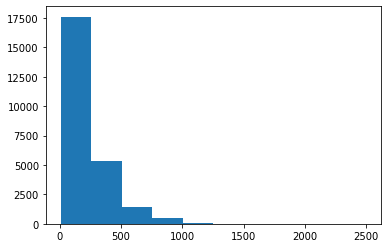

In [8]:
plt.hist(reviewLengths, bins=10)
plt.show()

In [9]:
max_length = 500  # This value should be chosen based on your data. 
                  # It looks like you intended 500 since you used input_length=500 in your Embedding layer.

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

Build a LSTM network

In [10]:
tf.random.set_seed(42)

In [11]:
model = models.Sequential()

In [12]:
embeddingSize = 32

In [13]:
model.add(layers.Embedding(vocab_size, embeddingSize, input_length=500))

In [14]:
model.add(layers.LSTM(50))

In [15]:
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

c:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 91s 454ms/step - loss: 0.5129 - accuracy: 0.7609 - val_loss: 0.3363 - val_accuracy: 0.8653
Epoch 2/10
196/196 [==============================] - 100s 510ms/step - loss: 0.3188 - accuracy: 0.8712 - val_loss: 0.3956 - val_accuracy: 0.8432
Epoch 3/10
196/196 [==============================] - 100s 512ms/step - loss: 0.2699 - accuracy: 0.8939 - val_loss: 0.6331 - val_accuracy: 0.7808
Epoch 4/10
196/196 [==============================] - 110s 560ms/step - loss: 0.2491 - accuracy: 0.9054 - val_loss: 0.3360 - val_accuracy: 0.8553
Epoch 5/10
196/196 [==============================] - 106s 541ms/step - loss: 0.2293 - accuracy: 0.9128 - val_loss: 0.2997 - val_accuracy: 0.8817
Epoch 6/10
196/196 [==============================] - 107s 549ms/step - loss: 0.2163 - accuracy: 0.9185 - val_loss: 0.2972 - val_accuracy: 0.8802
Epoch 7/10
196/196 [==============================] - 113s 576ms/step - loss: 0.2033 - accuracy: 0.9254 - val_loss: 0.4304 - 

In [18]:
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

In [19]:
filePath = 'model.hdf5'

In [20]:
checkpoint = ModelCheckpoint(filePath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [21]:
earlyStop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)

In [22]:
import numpy as np

In [23]:
def generateText(model, genLength, nVocab, indexToChar):
    index = np.random.randint(nVocab)
    yChar = [indexToChar[index]]
    x = np.zeros((1, genLength, nVocab))

    for i in range(genLength):
        x[0, i, :][index] = 1
        pred = model.predict(x[:, :i+1, :])[0][-1]
        index = np.argmax(pred)
        yChar.append(indexToChar[index])

    return ''.join(yChar)

In [24]:
class ResultChecker(Callback):
    def __init__(self, model, genLength, nVocab, indexToChar):
        self.model = model
        self.genLength = genLength
        self.nVocab = nVocab
        self.indexToChar = indexToChar

    def on_epoch_end(self, epoch, logs={}):
        print(generateText(self.model, self.genLength, self.nVocab, self.indexToChar))

In [25]:
resultChecker = ResultChecker(model, 100, vocab_size, imdb.get_word_index())

1641221/1641221 [==============================] - 1s 1us/step
